* 이번 Lab07_2는 코드를 눈으로만 보지말고 직접 쳐보세요!!

* 처음 보는 개념이 나오면 PyTorch로 시작하는 딥러닝 입문 책을 활용하세요!!

In [1]:
# Lab 7 Learning rate and Evaluation
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [3]:
# parameters
training_epochs = 15
batch_size = 100

In [5]:
# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/', #데이터를 다운로드 받을 경로
                          train=True, #True는 train 데이터
                          transform=transforms.ToTensor(), #데이터를 PyTorch 텐서로 변환
                          download=True) #해당 경로에 MNIST 데이터가 없다면 다운로드

#test 데이터셋을 불러오세요.
mnist_test = dsets.MNIST(root='MNIST_data/', #데이터를 다운로드 받을 경로
                          train=False, #True는 train 데이터
                          transform=transforms.ToTensor(), #데이터를 PyTorch 텐서로 변환
                          download=True) #해당 경로에 MNIST 데이터가 없다면 다운로드

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST\raw\train-images-idx3-ubyte.gz to MNIST_data/MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST\raw\train-labels-idx1-ubyte.gz to MNIST_data/MNIST\raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST\raw\t10k-images-idx3-ubyte.gz to MNIST_data/MNIST\raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST\raw\t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST\raw



In [6]:
# dataset loader
data_loader = torch.utils.data.DataLoader(dataset=mnist_train, #로드할 대상
                                          batch_size=batch_size, #배치크기
                                          shuffle=True, #Epoch마다 데이터 셋을 섞어서 데이터가 학습되는 순서를 바꿈.
                                          drop_last=True) #마지막 배치를 버릴 것인지

* drop_last를 하는 이유를 이해하기 위해서 1,000개의 데이터가 있다고 했을 때, 배치 크기가 128이라고 해봅시다. 1,000을 128로 나누면 총 7개가 나오고 나머지로 104개가 남습니다. 이때 104개를 마지막 배치로 한다고 하였을 때 128개를 충족하지 못하였으므로 104개를 그냥 버릴 수도 있습니다. 이때 마지막 배치를 버리려면 drop_last=True를 해주면 됩니다. 이는 다른 미니 배치보다 개수가 적은 마지막 배치를 경사 하강법에 사용하여 마지막 배치가 상대적으로 과대 평가되는 현상을 막아줍니다.

In [7]:
# MNIST data image of shape 28 * 28 = 784, 0~9까지 10개의 class
linear = torch.nn.Linear(784, 10, bias=True).to(device) #GPU를 사용하기 위해 .to(device)를 사용

In [8]:
# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)    # Softmax is internally computed.
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [10]:
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)

    for X, Y in data_loader:
        X = X.view(-1, 28 * 28).to(device) # 배치 크기가 100이므로 X는 (100, 784)의 텐서가 된다.
        Y = Y.to(device) # 레이블은 원-핫 인코딩이 된 상태가 아니라 0 ~ 9의 정수.

        #이 부분을 채워넣으세요.#  # gradient를 0으로 초기화
        hypothesis = linear(X)#이 부분을 채워넣으세요.# #모델을 생성해서 hypothesis를 구해보세요.
        cost = criterion(hypothesis, Y)#이 부분을 채워넣으세요.# #위에서 정의한 비용함수를 사용하세요.
        #이 부분을 채워넣으세요.#  # 비용 함수를 미분하여 gradient 계산
        #이 부분을 채워넣으세요.#  # W와 b를 업데이트
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.535150647
Epoch: 0002 cost = 0.359577745
Epoch: 0003 cost = 0.331264287
Epoch: 0004 cost = 0.316404700
Epoch: 0005 cost = 0.307106972
Epoch: 0006 cost = 0.300456554
Epoch: 0007 cost = 0.294933408
Epoch: 0008 cost = 0.290956199
Epoch: 0009 cost = 0.287074059
Epoch: 0010 cost = 0.284515619
Epoch: 0011 cost = 0.281914055
Epoch: 0012 cost = 0.279526889
Epoch: 0013 cost = 0.277636588
Epoch: 0014 cost = 0.275874794
Epoch: 0015 cost = 0.274422795
Learning finished


Accuracy: 0.8883000016212463
Label:  7
Prediction:  7


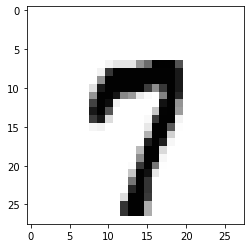

In [13]:
# Test the model using test sets
with torch.no_grad(): # torch.no_grad()를 하면 gradient 계산을 수행하지 않는다. test 할때는 gradient 계산이 필요가 없다.
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test # 각각의 데이터 마다 가장 큰 값의 인덱스를 취함 => class를 예측하는 것
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # MNIST 테스트 데이터에서 무작위로 하나를 뽑아서 예측을 해본다
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()